#Nama : Musthafa Zaki Bahar
#NIM  : 1301190335

Buatlah visualisasi wordcloud dari kumpulan opini/komentar terkait topik spesifik tertentu berbahasa Indonesia/Inggris.

Topik review course di platform coursera

In [ ]:
#Download dataset reviews on coursera
!gdown --id 1ganfFAYQKRwKGlY6useNdOzkmkAr532d

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ganfFAYQKRwKGlY6useNdOzkmkAr532d
To: /content/Coursera_reviews.csv
100% 272M/272M [00:00<00:00, 279MB/s]


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import WordCloud

import matplotlib.pyplot as plt

In [ ]:
#Load dataset
df = pd.read_csv('Coursera_reviews.csv')
df

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training
...,...,...,...,...,...
1454706,g,By Brijesh K,"Aug 25, 2020",5,computer-networking
1454707,.,By Vasavi V M,"Jul 02, 2020",5,computer-networking
1454708,.,By Drishti D,"Jun 20, 2020",5,computer-networking
1454709,.,By FAUSTINE F K,"Jun 07, 2020",5,computer-networking


In [ ]:
#Random sample dataset menjadi 10.000
#Untuk meringankan komputasi
df = df.sample(10000, replace=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 591074 to 943734
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviews       10000 non-null  object
 1   reviewers     10000 non-null  object
 2   date_reviews  10000 non-null  object
 3   rating        10000 non-null  int64 
 4   course_id     10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 468.8+ KB


In [ ]:
df.drop(columns=['reviewers', 'date_reviews'])

,reviews,rating,course_id
591074,"M encanto tomar este curso, esta muy bien expl...",5,physiology
336323,easy to learn 감사합니다 요,5,learn-korean
1032152,"Great, non-technical course on Machine Learnin...",4,machine-learning-business-professionals
170227,Very useful framework introduction!,4,negotiation-skills
654629,I learned a lo of things i had no idea about. ...,5,it-security
...,...,...,...
388661,"Espetacular, bem composto e prepara nos bem, p...",5,pap
278359,Excellent Learning Experience.,5,gcp-fundamentals
893721,This is an amazing course! Provides abstracts ...,5,dino101
1002771,The course was very helpful.,5,aws-machine-learning


Pretty dry, but I was able to pass with just two complete watches so I'm happy about that.  As usual there were some questions on the final exam that were NO WHERE in the course, which is annoying but far better than many microsoft tests I have taken.  Never found the suplimental material that the course references... but who cares... i passed!


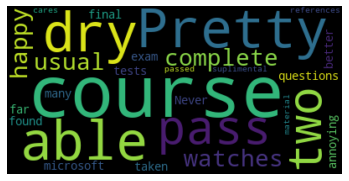

In [ ]:
# Start with one review:
text = df.reviews[0]
print(text)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# # Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import cv2
# Download gambar masking cloud
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

--2022-11-23 08:01:54--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg.1’

cloud.jpg.1         100%[===================>]  33.59K  --.-KB/s    in 0.001s  

2022-11-23 08:01:55 (48.3 MB/s) - ‘cloud.jpg.1’ saved [34396/34396]



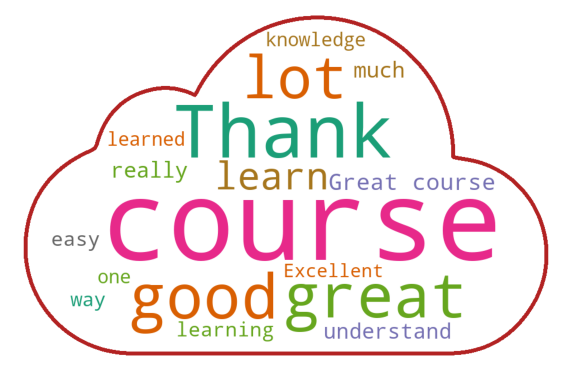

In [ ]:
# WordCloud review Course dengan Rating 5

course_reviews = df[df.rating == 5]
normal_string = []

for t in course_reviews.reviews:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

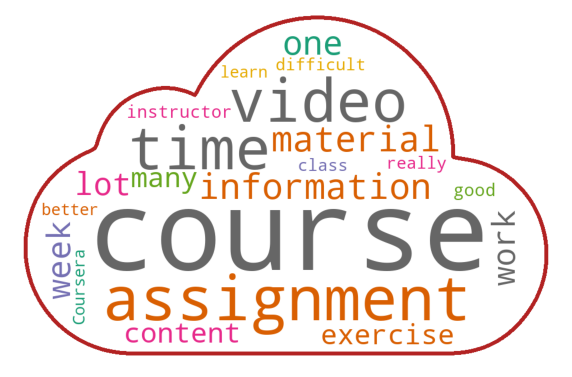

In [ ]:
# WordCloud review Course dengan Rating 1

course_reviews = df[df.rating == 1]
normal_string = []

for t in course_reviews.reviews:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()